<a href="https://colab.research.google.com/github/tiagobhz/aulaMBACapturaAvancada/blob/master/Exerc%C3%ADcio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import os
import pickle
import json
import requests
import matplotlib.pyplot as plt
import urllib.request
from bs4 import BeautifulSoup as BS
from zipfile import ZipFile


url = 'https://www.google.com/googlebooks/uspto-patents-grants-text.html'
response = urllib.request.urlopen(url)
response.status


soup = BS(response, 'html5lib')

In [2]:
alguns = soup.find_all('a', href=True)

In [3]:
alguns2 = [l.get('href') for l in alguns if 'http' in l.get('href')]

In [4]:
links_gft1 = [n for n in alguns2 if 'grant_full_text' in n]


links_gft2 = [n for n in links_gft1 if '.zip' in n]

In [5]:
from collections import defaultdict

my_dict = defaultdict(list)

In [6]:
for ano in range(1997,2016):
  for link in links_gft2:
    if str(ano) in link:
      my_dict[ano].append(link)

In [7]:
my_dict2 = {k:sum(1 for x in v if x) for k,v in my_dict.items()}

In [22]:
my_dict3 = sum(my_dict2.values())

In [17]:
for key, value in my_dict2.items() :
    print (f'No ano de {key} haviam {value} patentes')

No ano de 1997 haviam 52 patentes
No ano de 1998 haviam 52 patentes
No ano de 1999 haviam 52 patentes
No ano de 2000 haviam 52 patentes
No ano de 2001 haviam 104 patentes
No ano de 2002 haviam 53 patentes
No ano de 2003 haviam 52 patentes
No ano de 2004 haviam 52 patentes
No ano de 2005 haviam 52 patentes
No ano de 2006 haviam 52 patentes
No ano de 2007 haviam 52 patentes
No ano de 2008 haviam 53 patentes
No ano de 2009 haviam 52 patentes
No ano de 2010 haviam 57 patentes
No ano de 2011 haviam 58 patentes
No ano de 2012 haviam 57 patentes
No ano de 2013 haviam 54 patentes
No ano de 2014 haviam 52 patentes
No ano de 2015 haviam 11 patentes


In [24]:
print(f'Quantidade total de arquivos zip: {my_dict3}')

Quantidade total de arquivos zip: 1019


<BarContainer object of 19 artists>

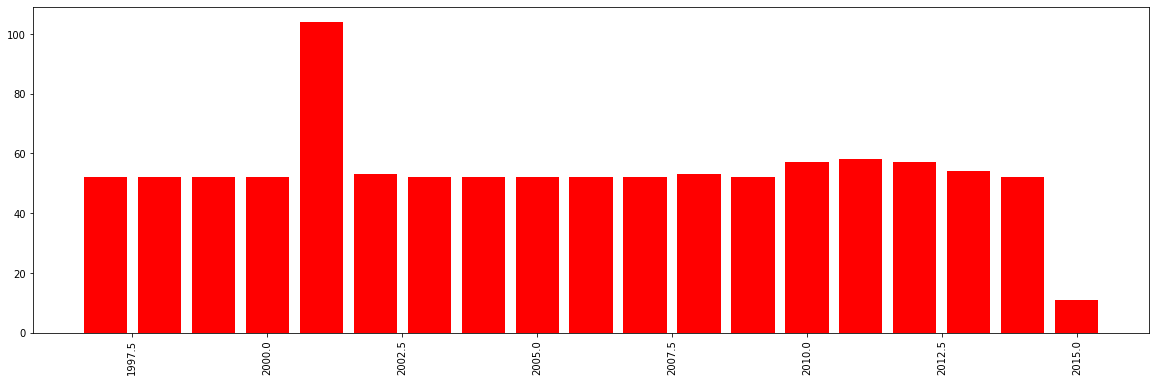

In [148]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.bar(my_dict2.keys(), my_dict2.values(), width=0.8, color='r')


In [ ]:
if not os.path.exists('data'):
    os.mkdir('data')

def save_pickle(ob, name):
    with open(name, 'wb') as handler:
        pickle.dump(ob, handler)
    print('Saved!!!')

save_pickle(my_dict, 'data/pyckle_my_dict')
save_pickle(my_dict2, 'data/pyckle_my_dict2')

In [11]:
json_object1 = json.dumps(my_dict)
json_object2 = json.dumps(my_dict2)

In [12]:
def save_json(ob, filename):
    with open(filename, 'w') as handler:
        json.dump(ob, handler)
    print(f'Saved! You can check {filename}')

# Loading
def load_json(filename):
    with open(filename, "r") as handler:
        ll = json.load(handler)
    print(f'A soma da lista lida é {sum(ll):,.0f}')

In [ ]:
save_json(json_object1, 'data/json1.json')
save_json(json_object2, 'data/json2.json')


In [73]:
lista1 = list(my_dict.values())[0]

In [77]:
lista2 = lista1[0]

'http://storage.googleapis.com/patents/grant_full_text/1997/pftaps19970107_wk01.zip'

In [84]:
name = lista2.split('/')[6]

'pftaps19970107_wk01.zip'

In [85]:
r = requests.get(lista2)
with open(f'data/{name}', 'wb') as handler:
    handler.write(r.content)

In [90]:
if not os.path.exists('temp'):
    os.mkdir('temp')


with ZipFile(f'data/{name}', 'r') as zipObj:
   zipObj.extractall('temp')


In [ ]:
datasize = defaultdict(list)

ano = [1997, 1998]
for key, values in my_dict.items():
  if key in ano:
    for value in values:
      with urllib.request.urlopen(value) as handler:
        datasize[key].append(int(handler.getheader('Content-Length')))

In [145]:
datasize2 = defaultdict(list)

for key in datasize:
  datasize2[key] = [sum(datasize[key])]

In [147]:
datasize2

defaultdict(list, {1997: [1412850219], 1998: [2032559450]})